## Guided Project 02_Exploring Hacker News Posts

### Project Objective <br>

We want to get an idea of how many comments are collected based on certain criteria. Below are the questions we strive to answer: <br>

1) Do Ask HN or Show HN receive more comments on average? <br>
2) Do posts created at a certain time receive more comments on average?

#id: The unique identifier from Hacker News for the post<br>
#title: The title of the post<br>
#url: The URL that the posts links to, if the post has a URL<br>
#num_points: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes<br>
#num_comments: The number of comments that were made on the post<br>
#author: The username of the person who submitted the post<br>
#created_at: The date and time at which the post was submitted<br>

In [74]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# import files
hacker_news = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv') 

# create copies
hacker1 = hacker_news.copy()

In [75]:
# getting started

print(hacker1.head())
hacker1.info()
hacker1.isnull().sum() # url is the only column with NaN values. We can probably drop the 'url' column

         id                                              title  \
0  12579008  You have two days to comment if you want stem ...   
1  12579005                         SQLAR  the SQLite Archiver   
2  12578997  What if we just printed a flatscreen televisio...   
3  12578989                                  algorithmic music   
4  12578979  How the Data Vault Enables the Next-Gen Data W...   

                                                 url  num_points  \
0  http://www.regulations.gov/document?D=FDA-2015...           1   
1   https://www.sqlite.org/sqlar/doc/trunk/README.md           1   
2  https://medium.com/vanmoof/our-secrets-out-f21...           1   
3  http://cacm.acm.org/magazines/2011/7/109891-al...           1   
4  https://www.talend.com/blog/2016/05/12/talend-...           1   

   num_comments        author      created_at  
0             0       altstar  9/26/2016 3:26  
1             0      blacksqr  9/26/2016 3:24  
2             0  pavel_lishin  9/26/2016 3:19  
3 

id                  0
title               0
url             13863
num_points          0
num_comments        0
author              0
created_at          0
dtype: int64

To answer the question "Do Ask HN or Show HN receive more comments on average?", we are going to:
    1) Identify the titles that begin with 'Ask HN' or 'Show HN' 
    2) Add the number of comments per title type
    3) Calculate the average number of comments

In [76]:
# data analysis
ask_posts = []
show_posts = []

def sort(dataset, column_name):
    ask_post1 = dataset[column_name].str.contains(r"Ask HN:")
    ask_postf = dataset[ask_post1]
    show_post1 = dataset[column_name].str.contains(r"Show HN:")
    show_postf = dataset[show_post1]
    result = [ask_postf, show_postf]
    return result

askhn = sort(hacker1, 'title')[0]
showhn = sort(hacker1, 'title')[1]


print('Ask HN oulined here:', '\n',askhn) #9110 'Ask HN' titles identified
print('\n') 
print('\n')
print('\n')           
print('Show HN oulined here:', '\n', showhn) #10141 'SHOW HN' titles identified

Ask HN oulined here: 
               id                                              title  url  \
10      12578908  Ask HN: What TLD do you use for local developm...  NaN   
42      12578522  Ask HN: How do you pass on your work when you ...  NaN   
76      12577908  Ask HN: How a DNS problem can be limited to a ...  NaN   
80      12577870  Ask HN: Why join a fund when you can be an angel?  NaN   
102     12577647  Ask HN: Someone uses stock trading as passive ...  NaN   
...          ...                                                ...  ...   
293047  10177359  Ask HN: Is coursera specialization in product ...  NaN   
293052  10177317  Ask HN: Any meteor devs out there who could sp...  NaN   
293055  10177309  Ask HN: Any recommendations for books about ra...  NaN   
293073  10177200  Ask HN: Where do you look for work if you need...  NaN   
293114  10176919        Ask HN: What is/are your favorite quote(s)?  NaN   

        num_points  num_comments          author       created_a

In [77]:
avgcomments_ask = askhn["num_comments"].sum()/askhn.shape[0]
print('Average comment count for Ask HN:', avgcomments_ask.round(2))

avgcomments_show = showhn["num_comments"].sum()/showhn.shape[0]
print('Average comment count for Show HN:', avgcomments_show.round(2))

ask_v_show = avgcomments_ask/avgcomments_show
print('The comment count for Ask HN is', ask_v_show.round(2), 'times greater than Show HN')

Average comment count for Ask HN: 10.41
Average comment count for Show HN: 4.89
The comment count for Ask HN is 2.13 times greater than Show HN


To answer the question "Do posts created at a certain time receive more comments on average?", we are going to:
    1) Split the column between date and time
    2) Identify the unique times outlined in the data
    3) Add the number of comments per time period
    4) Calculate the average number of comments per time period 
    5) Graph the result

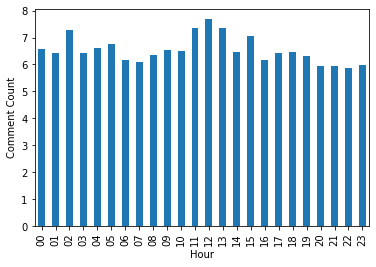

In [78]:
pattern1 = r"([0-9]*/[0-9]*/[0-9]*)"
pattern2 = r"([0-9]*:[0-9]*)"
pattern3 = r"([0-9]*)"

hacker1["date"] = hacker1["created_at"].str.extract(pattern1)
hacker1["time"] = hacker1["created_at"].str.extract(pattern2)
hacker1["hour"] = hacker1["time"].str.extract(pattern3)
hacker1["hour_pad"] = hacker1["hour"].str.pad(2, fillchar='0')

avg = hacker1.groupby("hour_pad")['num_comments'].mean()
avg_sort = avg.sort_index(axis = 0) 

avg_sort.plot.bar()
plt.xlabel('Hour')
plt.ylabel('Comment Count')
plt.show()

# Conclusion

In answering the questions proposed, we determined that: <br>

1) Do Ask HN or Show HN receive more comments on average? <br>

    Average comment count for Ask HN: 10.41 <br>
    Average comment count for Show HN: 4.89 <br>
    The comment count for Ask HN is 2.13 times greater than Show HN <br>

2) Do posts created at a certain time receive more comments on average?

    Posts created between 11AM and 1PM receive more comments on average. 